In [1]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model,Sequential
from sklearn.linear_model import LogisticRegression
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from sklearn.metrics import classification_report, accuracy_score
import joblib
import matplotlib.pyplot as plt

In [ ]:



img_height, img_width = 224, 224
batch_size = 32

train_dir = 'Dataset/train'
test_dir = 'Dataset/test'

datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2

)

datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2

)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    subset='training',
    shuffle=True,
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation',
    shuffle=True,
)

Found 4098 images belonging to 4 classes.
Found 254 images belonging to 4 classes.


In [3]:

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width,img_height,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))


c:\Users\Talee\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:


def extract_features(generator, max_steps=None):
    features = []
    labels = []
    steps = max_steps if max_steps else len(generator)
    for _ in range(steps):
        X, y = next(generator)
        batch_features = model.predict(X)
        features.append(batch_features)
        labels.append(y)
    return np.concatenate(features), np.concatenate(labels)


def extract_features_single_image(x,y):
    features = []
    labels = []
    batch_features = model.predict(x)
    features.append(batch_features)
    labels.append(y)
    return np.concatenate(features), np.concatenate(labels)



In [5]:

max_steps = None 

In [6]:
X_train, Y_train = extract_features(train_generator, max_steps)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [7]:

X_test, Y_test = extract_features(test_generator,max_steps)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


In [ ]:

#optmizer take alot of time

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV


LR_classifier = LogisticRegression()
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'class_weight': [None, 'balanced'],  # Weighting of classes
    'dual': [False],  # Only applicable for certain solvers (e.g., 'liblinear')
    'fit_intercept': [True, False],  # Whether to include an intercept
    'intercept_scaling': [1, 10],  # Only relevant if solver is 'liblinear'
    'l1_ratio': [0.1, 0.5, 0.9],  # Only for 'elasticnet' penalty and certain solvers
    'max_iter': [100, 200, 500],  # Maximum iterations for solver convergence
    'multi_class': ['auto', 'ovr', 'multinomial'],  # Multiclass strategy
    'n_jobs': [-1],  # Number of CPU cores used (useful for parallel processing)
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Type of regularization
    'random_state': [42],  # Ensures reproducibility
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Algorithm to use
    'tol': [1e-4, 1e-3, 1e-2],  # Tolerance for stopping criteria
    'verbose': [0, 1, 2],  # Controls verbosity
    'warm_start': [True, False],  # Reuse the solution of the previous call
}

 
grid_search = HalvingGridSearchCV(estimator=LR_classifier, param_grid=param_grid, cv=5,n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, Y_train)


print("Best parameters found: ", grid_search.best_params_)
best_model = grid_search.best_estimator_

c:\Users\Talee\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1231200 fits failed out of a total of 1944000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
97200 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Talee\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Talee\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\Talee\AppData\Local\Programs\Python\Python39\lib\sit

In [ ]:

LR_classifier = best_model

LR_classifier.fit(X_train, Y_train)

0:	learn: 1.1565527	total: 9.97ms	remaining: 4.98s
1:	learn: 1.0514544	total: 17.4ms	remaining: 4.33s
2:	learn: 0.9899694	total: 25.6ms	remaining: 4.24s
3:	learn: 0.9576035	total: 32.8ms	remaining: 4.07s
4:	learn: 0.9312072	total: 40.9ms	remaining: 4.05s
5:	learn: 0.9120167	total: 49.5ms	remaining: 4.08s
6:	learn: 0.8940133	total: 57.4ms	remaining: 4.04s
7:	learn: 0.8890885	total: 64.9ms	remaining: 3.99s
8:	learn: 0.8840788	total: 73.2ms	remaining: 3.99s
9:	learn: 0.8744906	total: 80.2ms	remaining: 3.93s
10:	learn: 0.8642148	total: 87.6ms	remaining: 3.89s
11:	learn: 0.8538845	total: 95.4ms	remaining: 3.88s
12:	learn: 0.8478452	total: 102ms	remaining: 3.82s
13:	learn: 0.8419159	total: 110ms	remaining: 3.8s
14:	learn: 0.8345193	total: 117ms	remaining: 3.79s
15:	learn: 0.8273814	total: 126ms	remaining: 3.82s
16:	learn: 0.8229420	total: 134ms	remaining: 3.79s
17:	learn: 0.8174758	total: 141ms	remaining: 3.79s
18:	learn: 0.8113592	total: 149ms	remaining: 3.77s
19:	learn: 0.8053173	total: 15

In [ ]:

y_pred = LR_classifier.predict(X_test)

score =accuracy_score(Y_test, y_pred)
print("Accuracy:", score)

Accuracy: 0.7007874015748031


In [ ]:

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.37      0.51        35
         1.0       1.00      0.50      0.67         2
         2.0       0.71      0.87      0.78       128
         3.0       0.65      0.60      0.62        89

    accuracy                           0.70       254
   macro avg       0.79      0.58      0.65       254
weighted avg       0.71      0.70      0.69       254



In [ ]:
joblib.dump(LR_classifier, 'LR_classifier.pkl')

['cb_classifier.pkl']

In [ ]:
LR_classifier_loaded = joblib.load('LR_classifier.pkl')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


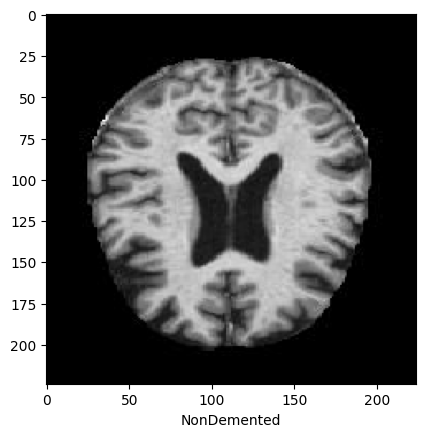

In [ ]:

random_image, random_label = next(test_generator)


x ,y = extract_features_single_image(random_image,random_label)

prediction = LR_classifier_loaded.predict(x)

class_labels = {0: 'MildDemented', 1: 'ModerateDemented',2: 'NonDemented',3:'VeryMildDemented'}

result = class_labels[prediction[0][0]]

plt.imshow(random_image[0]) 
plt.xlabel(result)
plt.show()
